In [1]:
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

File and Folder paths

In [64]:
dirpath = r"/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/"

In [65]:
out_fp = r"/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/mars_mosiac.tif"

Making a search criteria to find the .img files

In [66]:
search_criteria = "h*.img"
q = os.path.join(dirpath, search_criteria)
print (q)

/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h*.img


Now we can see that we have a search criteria (q) that we can pass to glob function.

In [67]:
dem_fps = glob.glob(q)
dem_fps

['/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_bl4.img',
 '/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_gr4.img',
 '/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_re4.img']

Cool! Now we have 7 files and we can make a mosaic out of them.

First we will create an empty list for the datafiles that will be the part of the mosaic.

In [68]:
src_files_to_mosaic = []

We will open all those files in mosaic mode and add those files into our source list.

In [69]:
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic

[<open DatasetReader name='/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_bl4.img' mode='r'>,
 <open DatasetReader name='/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_gr4.img' mode='r'>,
 <open DatasetReader name='/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/red_green_blue_/h0360_0000_re4.img' mode='r'>]

Now we have a list full of open raster objects

In [70]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

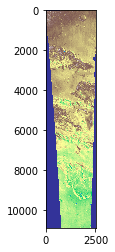

In [71]:
show(mosaic, cmap='terrain')

In [72]:
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                            "height": mosaic.shape[1],
                            "width": mosaic.shape[2],
                            "transform": out_trans,
                            "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "
                            }
                        )

In [73]:
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)


In [1]:
from PIL import Image
im = Image.open('/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360/mars_mosiac.tif')
im.show()